Transfer Learning - Fine Tuning can be done in 

1. Update the whole model on labeled data + any additional layers added on top
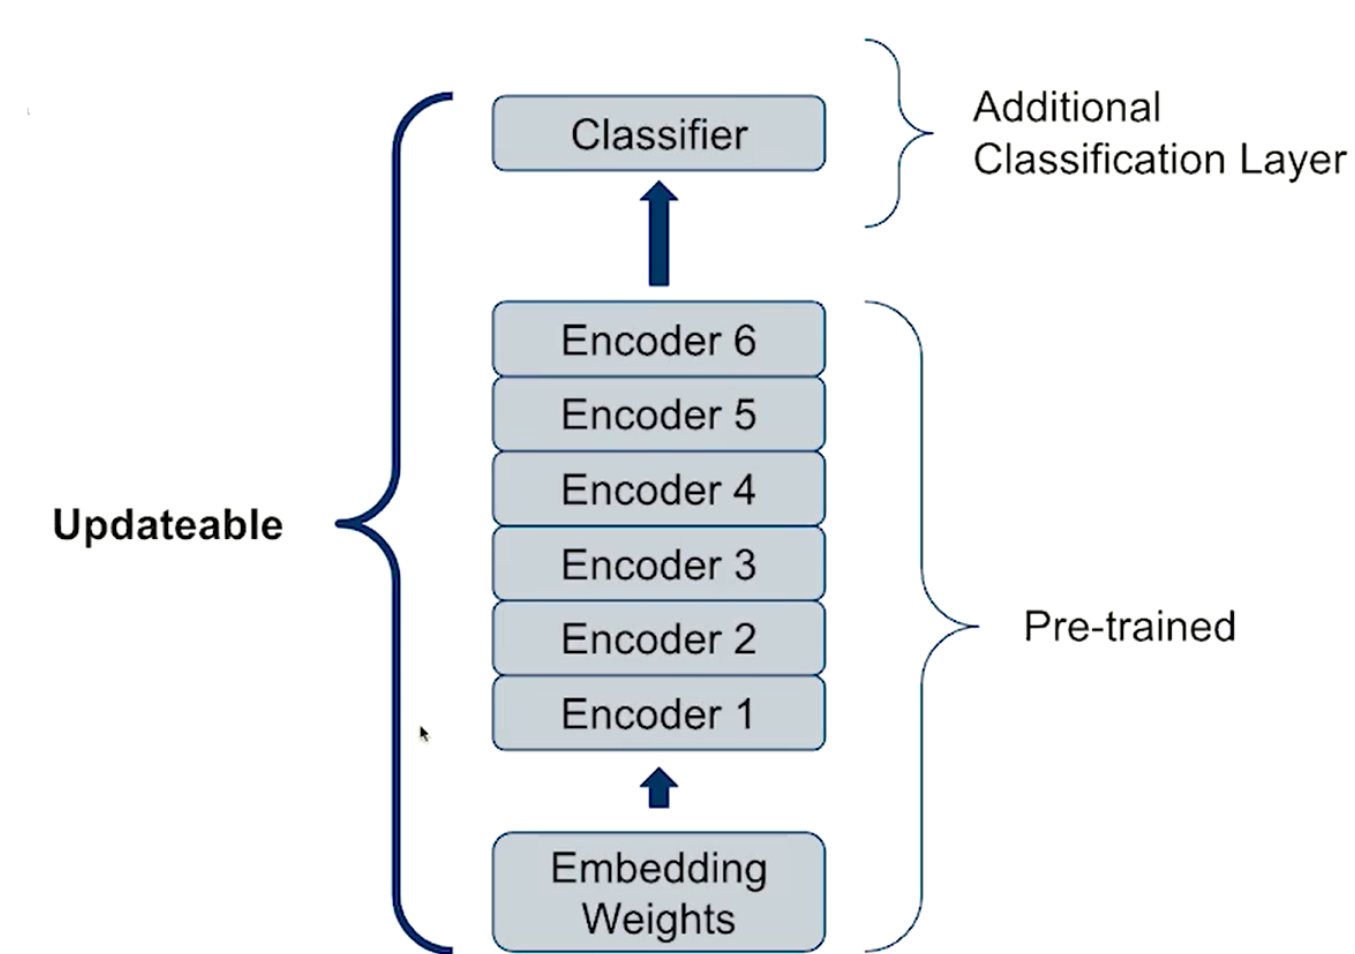

2. Freeze a subset of the model
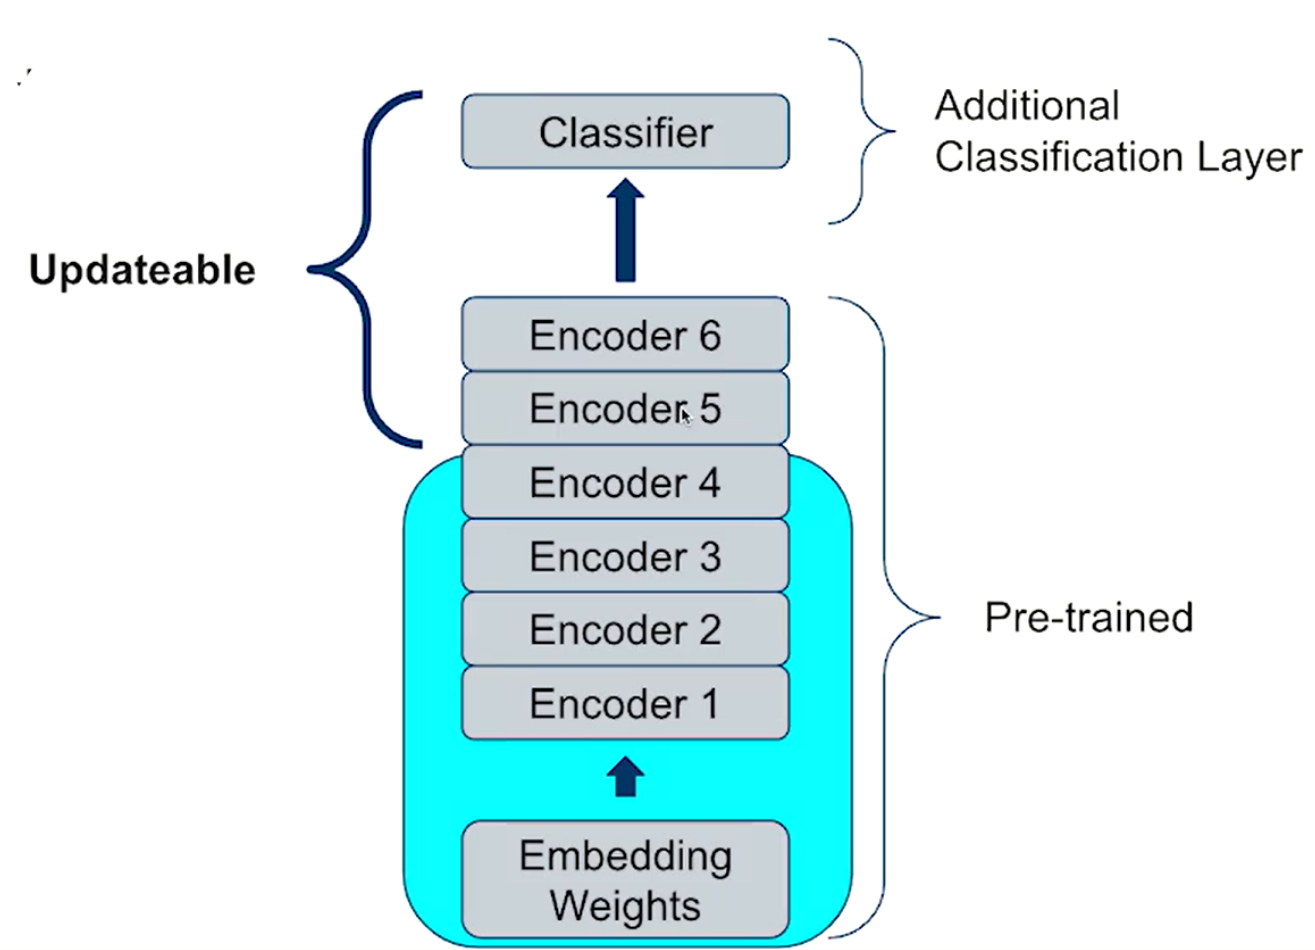

3. Freeze the whole model and only train the additional layers added on top

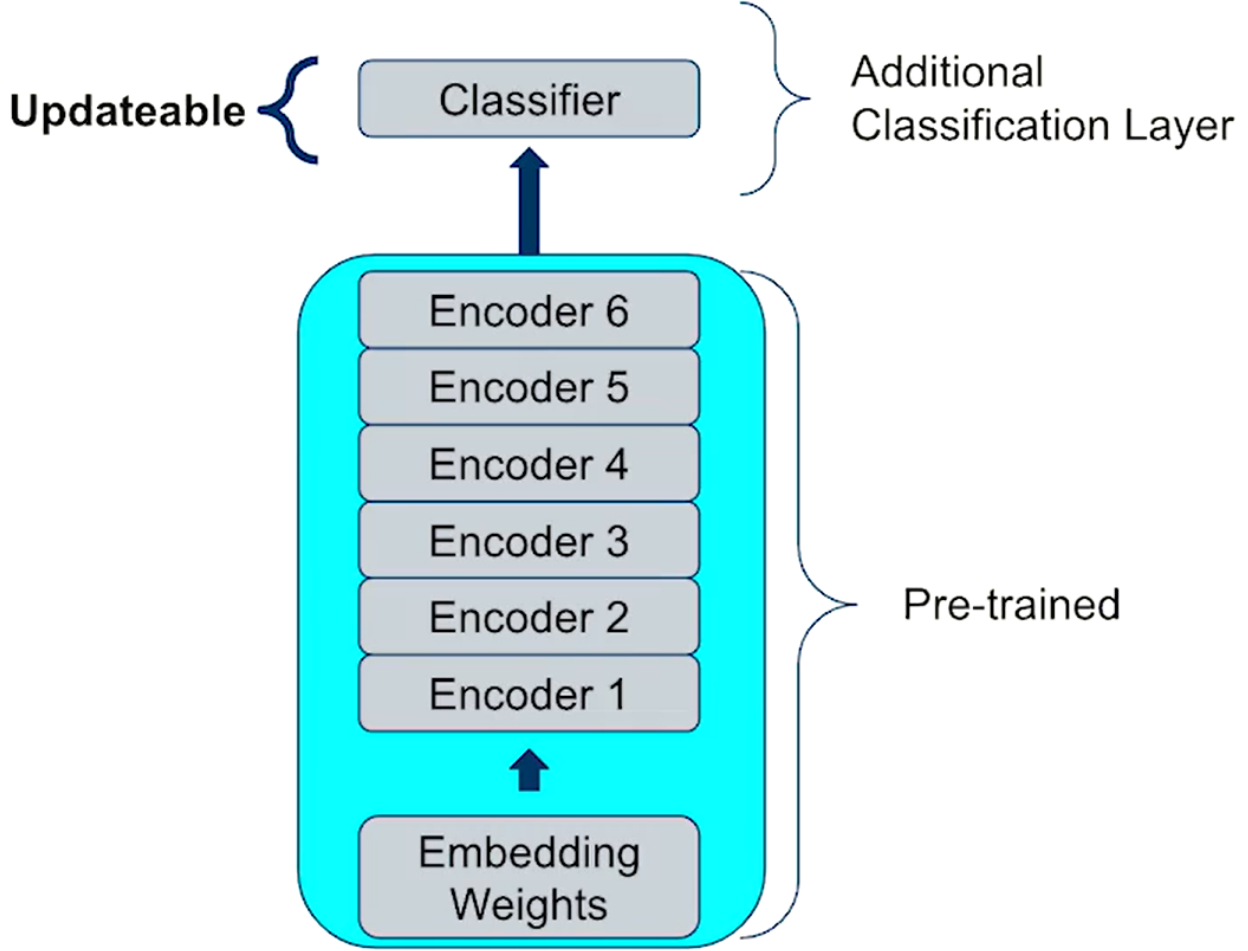

Finetuning with `HuggingFace's Trainer`

Provides a higher-level interface that encapsulates many of the complexities involved in the training loop, making it more convenient for users to train models 

Dataset - Holds all data and splits into training/testing sets
DataCollator - Forms batches of data from Datasets
TrainingArguments - Keeps track of training arguments like saving
strategy and learning rate scheduler parameters
Trainer - API to the Pytorch training loop for most standard cases

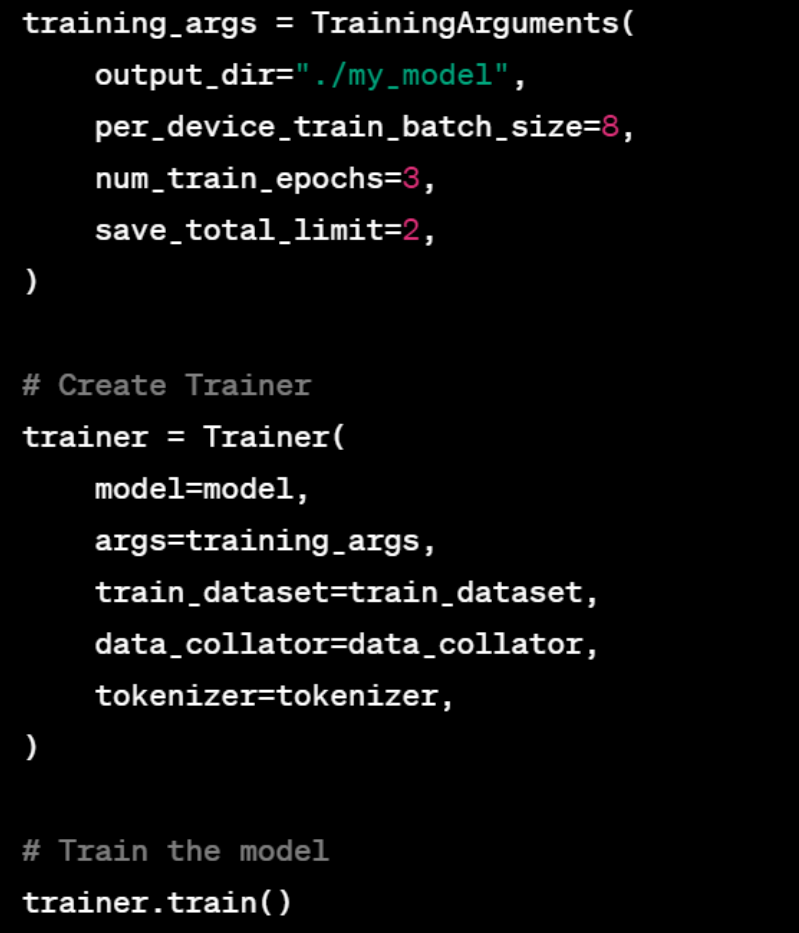

In [3]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)

tokenizer = BertTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [19]:
from transformers import pipeline, BertForQuestionAnswering, BertForTokenClassification, BertForSequenceClassification

In [11]:
bert_sq = BertForSequenceClassification.from_pretrained(model_name,num_labels=3)
bert_sq

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [8]:
bert_sq.classifier

Linear(in_features=768, out_features=3, bias=True)

In [10]:
bert_tc = BertForTokenClassification.from_pretrained(model_name)
bert_tc

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [12]:
bert_qa = BertForQuestionAnswering.from_pretrained(model_name)
bert_qa

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elem

In [17]:
# A fine tuned roberta model from huggingface that was trained on the stanford QA dataset - squad2
model_name = "deepset/roberta-base-squad2"
qa = pipeline(model=model_name,tokenizer=model_name,revision="v1.0",task="question-answering")

qa_text = "Which was his first Pokemon?","Agney has two pokemon, Pikachu and Lucario. Pikachu as his first Pokemon."

qa(*qa_text)

Some weights of the model checkpoint at deepset/roberta-base-squad2 were not used when initializing RobertaForQuestionAnswering: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'score': 0.3225554823875427, 'start': 44, 'end': 51, 'answer': 'Pikachu'}

## BERT for sequence classification

In [80]:
from transformers import Trainer, TrainingArguments, DistilBertForSequenceClassification, DistilBertTokenizerFast, DataCollatorWithPadding
from datasets import load_metric, Dataset
import numpy as np 

In [81]:
# SNIPS (SNIPS Natural Language Understanding benchmark)

snips_train_data = open('/kaggle/input/snips-dataset/SNIPS_train_data.txt')
snips_train_data_labels = open('/kaggle/input/snips-dataset/SNIPS_train_labels.txt')
snips_train_data_sequence_labeling = open('/kaggle/input/snips-dataset/SNIPS_train_label_for_tokens.txt')

snips_train_data = [line.strip() for line in snips_train_data]
sequence_labels = [line.strip() for line in snips_train_data_labels]
snips_train_data_sequence_labeling = [line.strip() for line in [line.strip() for line in snips_train_data_sequence_labeling]]

print(snips_train_data[0])
print(sequence_labels[0])

listen to westbam alumb allergic on google music
PlayMusic


In [82]:
tokenized_data = [sentence.split() for sentence in snips_train_data]
labels_for_tokens = [sentence.split() for sentence in snips_train_data_sequence_labeling]

print(tokenized_data[0])
print(labels_for_tokens[0])

['listen', 'to', 'westbam', 'alumb', 'allergic', 'on', 'google', 'music']
['O', 'O', 'B-artist', 'O', 'B-album', 'O', 'B-service', 'I-service']


In [83]:
unique_sequence_labels = list(set(sequence_labels))
unique_sequence_labels

['PlayMusic',
 'AddToPlaylist',
 'GetWeather',
 'SearchCreativeWork',
 'BookRestaurant',
 'RateBook',
 'SearchScreeningEvent']

In [84]:
sequence_labels = [unique_sequence_labels.index(i) for i in sequence_labels]

In [85]:
from functools import reduce

unique_token_labels = list(set(reduce(lambda x,y: x+y, labels_for_tokens)))
labels_for_tokens = [[unique_token_labels.index(_) for _ in i] for i in labels_for_tokens]

print(f"There are {len(unique_token_labels)} unique token labels")

There are 72 unique token labels


In [86]:
print(tokenized_data[0])
print(labels_for_tokens[0])
print([unique_token_labels[i] for i in labels_for_tokens[0]])
print(snips_train_data[0])
print(sequence_labels[0])
print(unique_sequence_labels[sequence_labels[0]])

['listen', 'to', 'westbam', 'alumb', 'allergic', 'on', 'google', 'music']
[25, 25, 34, 25, 71, 25, 56, 22]
['O', 'O', 'B-artist', 'O', 'B-album', 'O', 'B-service', 'I-service']
listen to westbam alumb allergic on google music
0
PlayMusic


In [99]:
snips_dataset = Dataset.from_dict(
    dict(
        utterance=snips_train_data,    
        label=sequence_labels,
        tokens=tokenized_data,
        token_labels=labels_for_tokens
        )
)

snips_dataset = snips_dataset.train_test_split(test_size=0.2)

In [100]:
snips_dataset['train'][0]

{'utterance': 'play good pure soul on netflix',
 'label': 0,
 'tokens': ['play', 'good', 'pure', 'soul', 'on', 'netflix'],
 'token_labels': [25, 55, 34, 14, 25, 56]}

In [101]:
# All data in SNIPS is lowercased
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [102]:
def preprocessor(examples):    
    return tokenizer(examples["utterance"],truncation=True) # Anything beyond 512 will be truncated

In [103]:
seq_clf_tokenized_snips = snips_dataset.map(preprocessor, batched=True)

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [104]:
seq_clf_tokenized_snips['train'][0]

{'utterance': 'play good pure soul on netflix',
 'label': 0,
 'tokens': ['play', 'good', 'pure', 'soul', 'on', 'netflix'],
 'token_labels': [25, 55, 34, 14, 25, 56],
 'input_ids': [101, 2377, 2204, 5760, 3969, 2006, 20907, 102],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

Use DataCollator to create a batch of data, It also dynamically pads text to the length of the longest element in the batch, making them all the same length.

Data Collator will pad data so that all examples are the same input length.
Attention mask is how we ignore attention scores for padding tokens

In [105]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [107]:
# sequence classification model

sequence_clf_model = DistilBertForSequenceClassification.from_pretrained(
                        'distilbert-base-uncased',
                        num_labels = len(unique_sequence_labels)                            
                    )

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [108]:
sequence_clf_model.config.id2label = {i: x for i,x in enumerate(unique_sequence_labels)}

In [109]:
sequence_clf_model.config.id2label[0]

'PlayMusic'

In [110]:
metric = load_metric("accuracy")

def compute_metric(eval_preds):
    logits,labels = eval_preds
    predictions = np.argmax(logits,axis=1)
    return metric.compute(predictions=predictions,references=labels)

In [111]:
import os

# Specify the directory path
results_directory = '/kaggle/working/results'

# Create the directory if it doesn't exist
os.makedirs(results_directory, exist_ok=True)

# Verify that the directory has been created
if os.path.exists(results_directory):
    print(f"Directory '{results_directory}' has been created successfully.")
else:
    print(f"Failed to create directory '{results_directory}'.")

Directory '/kaggle/working/results' has been created successfully.


In [113]:
EPOCHS = 2

training_args = TrainingArguments(
    
    output_dir="/kaggle/working/results",
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    load_best_model_at_end=True,
    
    warmup_steps = len(seq_clf_tokenized_snips['train']) // 5,
    weight_decay = 0.05,
    
    logging_steps = 1,
    log_level ='info',
    evaluation_strategy ='epoch',
    save_strategy = 'epoch')

trainer = Trainer(        
            model = sequence_clf_model,
            args = training_args,                    
            train_dataset = seq_clf_tokenized_snips['train'],
            eval_dataset = seq_clf_tokenized_snips['test'],
            compute_metrics = compute_metric,            
            data_collator = data_collator
)

In [114]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2617
  Batch size = 32
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


{'eval_loss': 1.947410225868225,
 'eval_accuracy': 0.14291173098968285,
 'eval_runtime': 45.7771,
 'eval_samples_per_second': 57.168,
 'eval_steps_per_second': 1.791}

In [115]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 10,467
  Num Epochs = 2
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 656
  Number of trainable parameters = 66,958,855


Epoch,Training Loss,Validation Loss,Accuracy
1,0.287000,0.228009,0.975545
2,0.024300,0.060666,0.987390


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2617
  Batch size = 32
Saving model checkpoint to /kaggle/working/results/tmp-checkpoint-328
Configuration saved in /kaggle/working/results/tmp-checkpoint-328/config.json
Model weights saved in /kaggle/working/results/tmp-checkpoint-328/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2

TrainOutput(global_step=656, training_loss=0.7127909856626946, metrics={'train_runtime': 1535.9183, 'train_samples_per_second': 13.63, 'train_steps_per_second': 0.427, 'total_flos': 116936966869314.0, 'train_loss': 0.7127909856626946, 'epoch': 2.0})

In [118]:
# Testing our model

pipe = pipeline("text-classification", sequence_clf_model, tokenizer=tokenizer)
pipe("Add Can't Take My Eyes Off You to my Beatles playlist")         

[{'label': 'AddToPlaylist', 'score': 0.9886701107025146}]

In [119]:
trainer.save_model()

Saving model checkpoint to /kaggle/working/results
Configuration saved in /kaggle/working/results/config.json
Model weights saved in /kaggle/working/results/pytorch_model.bin


In [121]:
pipe = pipeline("text-classification", "/kaggle/working/results", tokenizer=tokenizer)
pipe("Please book a table for 2 at the Imperial Sushi for Sunday afteroon")  

loading configuration file /kaggle/working/results/config.json
Model config DistilBertConfig {
  "_name_or_path": "/kaggle/working/results",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "PlayMusic",
    "1": "AddToPlaylist",
    "2": "GetWeather",
    "3": "SearchCreativeWork",
    "4": "BookRestaurant",
    "5": "RateBook",
    "6": "SearchScreeningEvent"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "

[{'label': 'BookRestaurant', 'score': 0.9878103733062744}]

In [122]:
# Fine tuning by 
# only updating the final layers in DistilBert

frozen_sequence_clf_model = DistilBertForSequenceClassification.from_pretrained(
                        'distilbert-base-uncased',
                        num_labels = len(unique_sequence_labels)                            
                    )

for params in frozen_sequence_clf_model.distilbert.parameters():
    params.requires_grad = False
    
EPOCHS = 2

training_args = TrainingArguments(
    
    output_dir="/kaggle/working/results",
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    load_best_model_at_end=True,
    
    warmup_steps = len(seq_clf_tokenized_snips['train']) // 5,
    weight_decay = 0.05,
    
    logging_steps = 1,
    log_level ='info',
    evaluation_strategy ='epoch',
    save_strategy = 'epoch')

trainer = Trainer(        
            model = frozen_sequence_clf_model,
            args = training_args,                    
            train_dataset = seq_clf_tokenized_snips['train'],
            eval_dataset = seq_clf_tokenized_snips['test'],
            compute_metrics = compute_metric,            
            data_collator = data_collator
)    

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.36.0",
  "vocab_size": 30522
}

loading 

In [123]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 10,467
  Num Epochs = 2
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 656
  Number of trainable parameters = 595,975
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


Epoch,Training Loss,Validation Loss,Accuracy
1,1.829200,1.868597,0.568972
2,1.504300,1.574015,0.833397


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2617
  Batch size = 32
Checkpoint destination directory /kaggle/working/results/checkpoint-328 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Saving model checkpoint to /kaggle/working/results/checkpoint-328
Configuration saved in /kaggle/working/results/checkpoint-328/config.json
Model weights saved in /kaggle/working/results/checkpoint-328/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not

TrainOutput(global_step=656, training_loss=1.8444593586936229, metrics={'train_runtime': 484.9802, 'train_samples_per_second': 43.165, 'train_steps_per_second': 1.353, 'total_flos': 116936966869314.0, 'train_loss': 1.8444593586936229, 'epoch': 2.0})

In [125]:
pipe = pipeline("text-classification", frozen_sequence_clf_model, tokenizer=tokenizer)
pipe("Please book a table for 2 at the Imperial Sushi for Sunday afteroon")  

[{'label': 'LABEL_4', 'score': 0.1893148422241211}]